**<h1>Evaluation of Student Adaptation in Online Learning Using SVM</h1>**

Tujuan teknis dari proyek ini adalah untuk mengembangkan model prediktif yang dapat mengukur seberapa baik siswa dan mahasiswa beradaptasi dengan pembelajaran daring. Model ini dimaksudkan untuk membantu institusi pendidikan dan pembuat kebijakan dalam memahami efektivitas implementasi pembelajaran daring dan mengidentifikasi area yang memerlukan peningkatan atau dukungan lebih lanjut.

# Import Data

**Import Library**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

**Load Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
url = '/content/drive/MyDrive/dataset/lsp.csv'
df = pd.read_csv(url)

**EDA**

In [4]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [5]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}\n")


Unique values in 'Gender': ['Boy' 'Girl']

Unique values in 'Age': ['21-25' '16-20' '11-15' '26-30' '6-10' '1-5']

Unique values in 'Education Level': ['University' 'College' 'School']

Unique values in 'Institution Type': ['Non Government' 'Government']

Unique values in 'IT Student': ['No' 'Yes']

Unique values in 'Location': ['Yes' 'No']

Unique values in 'Load-shedding': ['Low' 'High']

Unique values in 'Financial Condition': ['Mid' 'Poor' 'Rich']

Unique values in 'Internet Type': ['Wifi' 'Mobile Data']

Unique values in 'Network Type': ['4G' '3G' '2G']

Unique values in 'Class Duration': ['3-6' '1-3' '0']

Unique values in 'Self Lms': ['No' 'Yes']

Unique values in 'Device': ['Tab' 'Mobile' 'Computer']

Unique values in 'Adaptivity Level': ['Moderate' 'Low' 'High']



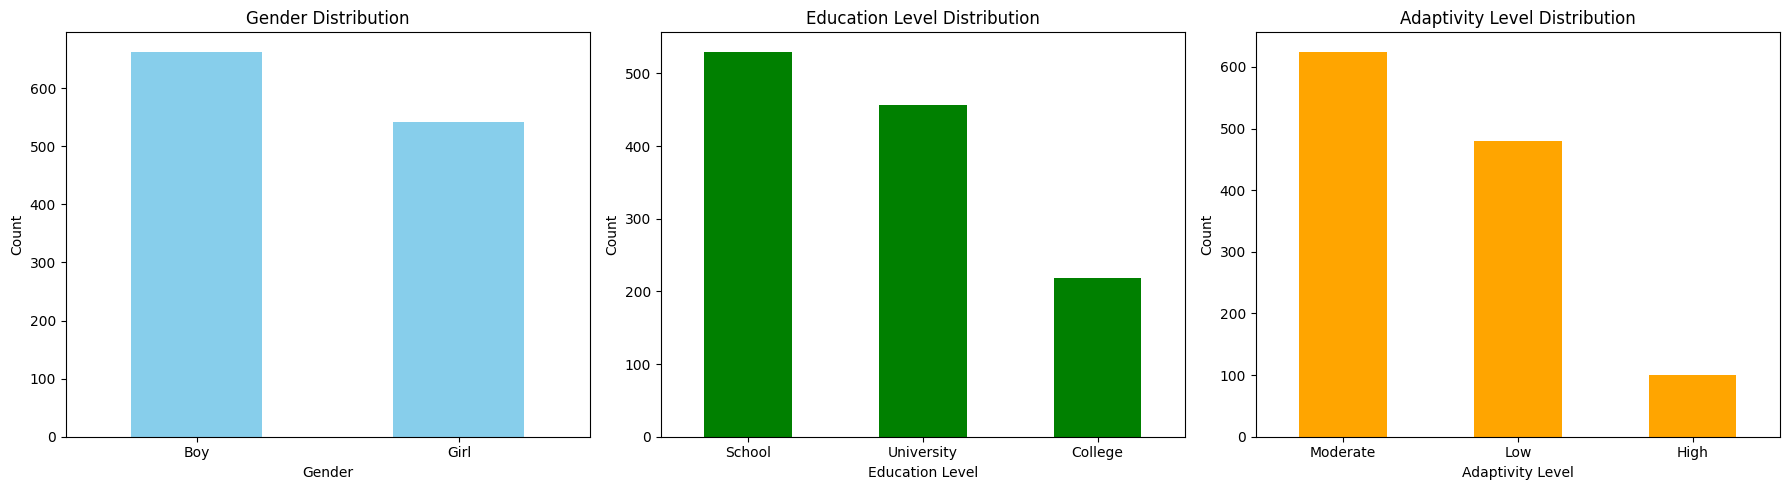

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

df['Gender'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

df['Education Level'].value_counts().plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Education Level Distribution')
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

df['Adaptivity Level'].value_counts().plot(kind='bar', ax=axes[2], color='orange')
axes[2].set_title('Adaptivity Level Distribution')
axes[2].set_xlabel('Adaptivity Level')
axes[2].set_ylabel('Count')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [8]:
df.isnull().sum()

,0
Gender,0
Age,0
Education Level,0
Institution Type,0
IT Student,0
Location,0
Load-shedding,0
Financial Condition,0
Internet Type,0
Network Type,0


# Menentukan objek data

**Buat 2 variabel array X dan Y, isi array X dengan data feature dan dan array Y dengan data target.**

In [9]:
X = df.drop('Adaptivity Level', axis=1)
Y = df['Adaptivity Level']

In [10]:
print("Preview of feature dataset (X):")
X.head()

Preview of feature dataset (X):


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile


In [11]:
print("\nPreview of target dataset (Y):")
Y.head()


Preview of target dataset (Y):


,Adaptivity Level
0,Moderate
1,Moderate
2,Moderate
3,Moderate
4,Low


# Mengkonstruksi data

**Ubah data categorical yang terdapat pada array X dan Y menjadi data numeric.**

In [12]:
le = LabelEncoder()

for col in X.columns:
    X[col] = le.fit_transform(X[col])

In [13]:
Y = le.fit_transform(Y)

In [14]:
print("Preview of encoded feature dataset (X):")
X.head()

Preview of encoded feature dataset (X):


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device
0,0,3,2,1,0,1,1,0,1,2,2,0,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1
2,1,2,0,0,0,1,1,0,1,2,1,0,1
3,1,1,1,1,0,1,1,0,0,2,1,0,1
4,1,2,1,1,0,1,1,1,0,1,0,0,1


In [15]:
print("\nPreview of encoded target dataset (Y):")
Y[:5]


Preview of encoded target dataset (Y):


array([2, 2, 2, 2, 1])

# Membangun Scenario Model

**Split dataset menjadi 2 yaitu data train dan data test dengan rasio 90:10**

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

**Menggunakan Support Vector Machine (SVM) untuk melatih model**

In [17]:
svm_model = SVC(kernel='linear', random_state=42)

# Membangun Model

In [18]:
svm_model.fit(X_train, Y_train)
print("SVM model has been successfully trained.")

SVM model has been successfully trained.


# Evaluasi Model

In [19]:
Y_pred = svm_model.predict(X_test)

In [20]:
print("Predictions on the test set:")
print(Y_pred)

Predictions on the test set:
[2 2 2 2 2 0 2 2 2 2 0 0 2 2 1 2 2 2 2 1 1 2 2 0 1 2 2 0 2 2 1 2 0 0 2 1 2
 2 2 1 1 0 2 2 2 2 2 1 1 2 2 0 1 2 2 2 2 1 1 2 2 1 1 2 1 2 1 1 2 2 2 1 2 2
 1 2 2 2 2 2 1 2 2 2 2 1 2 2 1 2 2 1 2 1 0 2 2 2 1 2 2 1 2 1 1 2 1 0 2 2 2
 2 2 2 2 2 1 2 1 1 0]


In [21]:
comparison_df = pd.DataFrame({'Actual Label': Y_test, 'Predicted Label': Y_pred})

print("Comparison of Actual and Predicted Labels:")
print(comparison_df.head(10))


Comparison of Actual and Predicted Labels:
   Actual Label  Predicted Label
0             2                2
1             2                2
2             2                2
3             0                2
4             2                2
5             0                0
6             2                2
7             1                2
8             2                2
9             0                2


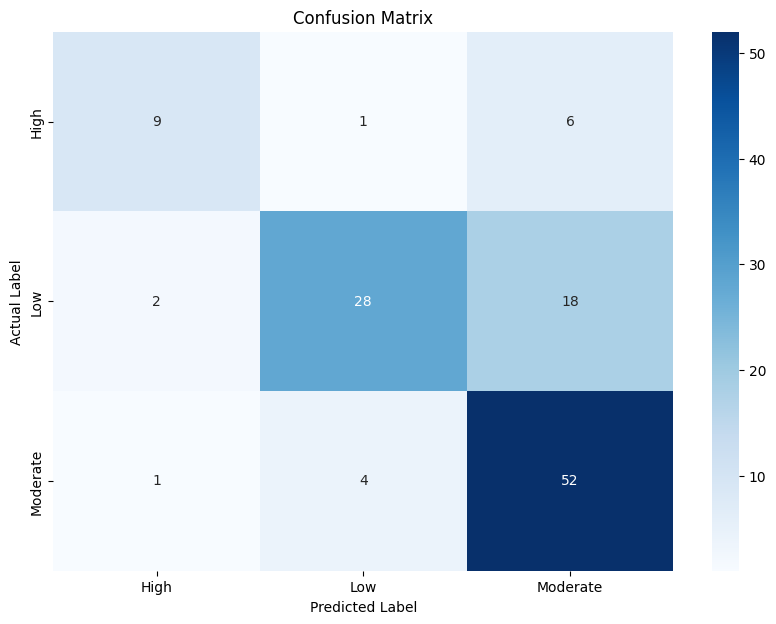

In [22]:
conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


In [23]:
accuracy = accuracy_score(Y_test, Y_pred)
print("\nAccuracy of the model on test data:", accuracy)


Accuracy of the model on test data: 0.7355371900826446


In [24]:
class_report = classification_report(Y_test, Y_pred, target_names=le.classes_)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

        High       0.75      0.56      0.64        16
         Low       0.85      0.58      0.69        48
    Moderate       0.68      0.91      0.78        57

    accuracy                           0.74       121
   macro avg       0.76      0.69      0.71       121
weighted avg       0.76      0.74      0.73       121



# Hyperparameter Tuning

In [25]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
svm_grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [26]:
print("Best parameters found:")
print(svm_grid.best_params_)

Best parameters found:
{'C': 100, 'gamma': 'scale', 'kernel': 'poly'}


In [27]:
print("\nBest score achieved:")
print(svm_grid.best_score_)


Best score achieved:
0.900384024577573


In [28]:
best_svm = svm_grid.best_estimator_
test_accuracy = best_svm.score(X_test, Y_test)
print("\nAccuracy on the test set with the best model:", test_accuracy)


Accuracy on the test set with the best model: 0.9008264462809917


In [29]:
best_Y_pred = best_svm.predict(X_test)
best_class_report = classification_report(Y_test, best_Y_pred, target_names=le.classes_)

print("Classification Report for the Best SVM Model:")
print(best_class_report)

Classification Report for the Best SVM Model:
              precision    recall  f1-score   support

        High       0.92      0.75      0.83        16
         Low       0.90      0.94      0.92        48
    Moderate       0.90      0.91      0.90        57

    accuracy                           0.90       121
   macro avg       0.91      0.87      0.88       121
weighted avg       0.90      0.90      0.90       121



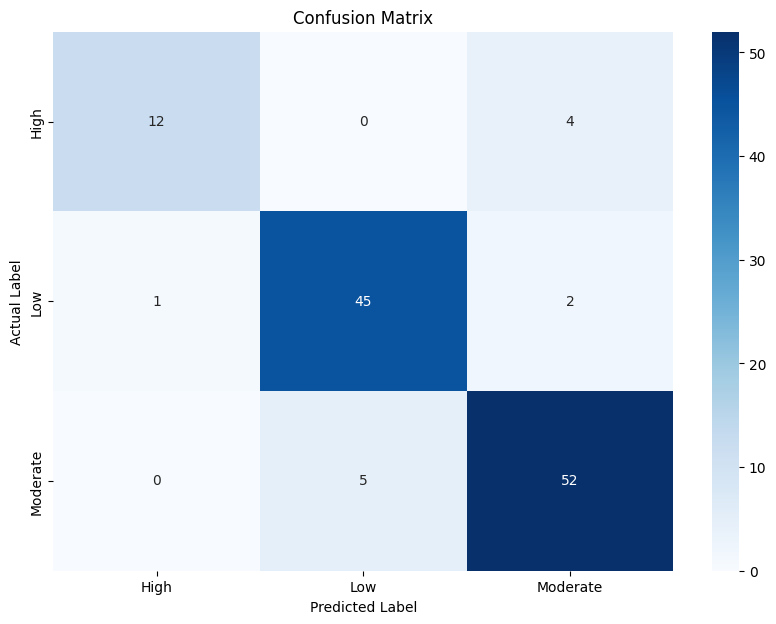

In [30]:
conf_matrix = confusion_matrix(Y_test, best_Y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


In [31]:
comparison_df = pd.DataFrame({'Actual Label': Y_test, 'Predicted Label': best_Y_pred})

print("Comparison of Actual and Predicted Labels:")
print(comparison_df.head(10))

Comparison of Actual and Predicted Labels:
   Actual Label  Predicted Label
0             2                2
1             2                2
2             2                2
3             0                0
4             2                2
5             0                0
6             2                1
7             1                1
8             2                2
9             0                0
